In [1]:
# Runtime was changed to R, haven will read the .xpt files and ggplot will help with visualizations
install.packages("haven")
library(haven)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load all XPT files
demo <- read_xpt("/content/DEMO_L.xpt")
bpxo <- read_xpt("/content/BPXO_L.xpt")
vid <- read_xpt("/content/VID_L.xpt")
hepb <- read_xpt("/content/HEPB_S_L.xpt")
kiq <- read_xpt("/content/KIQ_U_L.xpt")
paq <- read_xpt("/content/PAQ_L.xpt")
whq <- read_xpt("/content/WHQ_L.xpt")

# To clean the data, I removed placeholder (7777, 9999, 77, 99, 7, 9) and missing values from all of the files

# Demographics data: Removed refused/don't know for marital status and education
demo_clean <- subset(demo,
                     !is.na(DMDMARTZ) & DMDMARTZ != 77 & DMDMARTZ != 99 &
                     !is.na(DMDEDUC2) & DMDEDUC2 != 7 & DMDEDUC2 != 9 &
                     !is.na(RIDAGEYR))

# Blood Pressure data: Removed missing systolic and diastolic readings
bpxo_clean <- subset(bpxo, !is.na(BPXOSY3) & !is.na(BPXODI3))

# Vitamin D data: Removed missing values
vid_clean <- subset(vid, !is.na(LBDVD2LC))

# Hepatitis B data: Removed missing values
hepb_clean <- subset(hepb, !is.na(LBXHBS))

# Kidney function data: Removed refused/don't know/missing values
kiq_clean <- subset(kiq, !is.na(KIQ022) & KIQ022 != 7 & KIQ022 != 9)

# Physical Activity data: Removed refused/don't know/missing values for sedentary behavior
paq_clean <- subset(paq, !is.na(PAD680) & PAD680 != 7777 & PAD680 != 9999)

# Weight History data: Removed refused/don't know/missing values for weight
whq_clean <- subset(whq, !is.na(WHD020) & WHD020 != 7777 & WHD020 != 9999)


In [3]:
# QUESTION 1: Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?

# Method of analysis: Chi-Square test
# Method justification: Since marital status and education level are categorical variables, a Chi-Square test is best.
# IV = Marital Status (categorical)
# DV = Education Level (categorical)
# Results: X-squared = 129.17, df = 1, p-value < 2.2e-16
# Interpretation of results and conclusion: Married individuals are more likely to have a bachelor's degree or higher compared to those who are not married. P value confirms that there is a highly significant association between marital status and education level.

# DATA RECODING (Data already cleaned in Cell 2, reference cell 2 for cleaning)

# Recoding of Marital Status (DMDMARTZ): 1 = Married/Living With Partner, 2-6 = Various Non-Married Statuses
demo_clean$marital_binary <- ifelse(demo_clean$DMDMARTZ == 1, "Married", "Not Married")

# Recoding of Education (DMDEDUC2): 5=Bachelor's or higher, 1-4=Less than Bachelor's
demo_clean$education_binary <- ifelse(demo_clean$DMDEDUC2 == 5, "Bachelor's or Higher", "Less than Bachelor's")

# Created subset of data
q1_data <- demo_clean[!is.na(demo_clean$marital_binary) & !is.na(demo_clean$education_binary), ]

# Contingency table
contingency_table <- table(q1_data$marital_binary, q1_data$education_binary)
print(contingency_table)

# Chi-Square test and print of results
chi2_test <- chisq.test(contingency_table)
print(chi2_test)

             
              Bachelor's or Higher Less than Bachelor's
  Married                     1631                 2503
  Not Married                  990                 2648

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 129.17, df = 1, p-value < 2.2e-16



In [4]:
# QUESTION 2: Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?

# Method of analysis: T-test
# Method justification: We're comparing the mean of a continuous variable (sedentary minutes) between two groups (married vs not married).
# IV = Martial status (categorical, 2 groups)
# DV = Sedentary behavior time (continuous)
# Results: t = -3.8609, df = 7385.2, p-value = 0.0001139, Mean (Married): 353.2108 minutes, Mean (Not Married): 371.9341 minutes
# Interpretation of results and conclusion: Non-married individuals spend more time in sedentary behavior (approximately 19 minutes more per day on average) compared to married individuals. P value confirms a statistically significant difference in sedentary behavior between married and not married individuals.

# Recoded marital status like in cell 3
demo_clean$marital_binary <- ifelse(demo_clean$DMDMARTZ == 1, "Married", "Not Married")

# Merged demo_clean + paq_clean by SEQN
q2_df <- merge(demo_clean, paq_clean, by="SEQN")

# Subset data by marital status
married_sedentary <- subset(q2_df, marital_binary == 'Married')$PAD680 # married
not_married_sedentary <- subset(q2_df, marital_binary == 'Not Married')$PAD680 # not married

# Calculated means
married_mean <- mean(married_sedentary, na.rm=TRUE) # Average sedentary time for married
not_married_mean <- mean(not_married_sedentary, na.rm=TRUE) # Average sedentary time for not married

# T-Test
t_test_result <- t.test(married_sedentary, not_married_sedentary, var.equal = FALSE)
print(t_test_result)


	Welch Two Sample t-test

data:  married_sedentary and not_married_sedentary
t = -3.8609, df = 7385.2, p-value = 0.0001139
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -28.229667  -9.216944
sample estimates:
mean of x mean of y 
 353.2108  371.9341 




Call:
lm(formula = BPXOSY3 ~ RIDAGEYR + marital_binary, data = q3_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.251 -11.196  -1.467   9.385 106.119 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               100.81767    0.78505 128.422   <2e-16 ***
RIDAGEYR                    0.39524    0.01314  30.090   <2e-16 ***
marital_binaryNot Married   1.34909    0.45110   2.991   0.0028 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.1 on 5832 degrees of freedom
Multiple R-squared:  0.1344,	Adjusted R-squared:  0.1341 
F-statistic: 452.9 on 2 and 5832 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


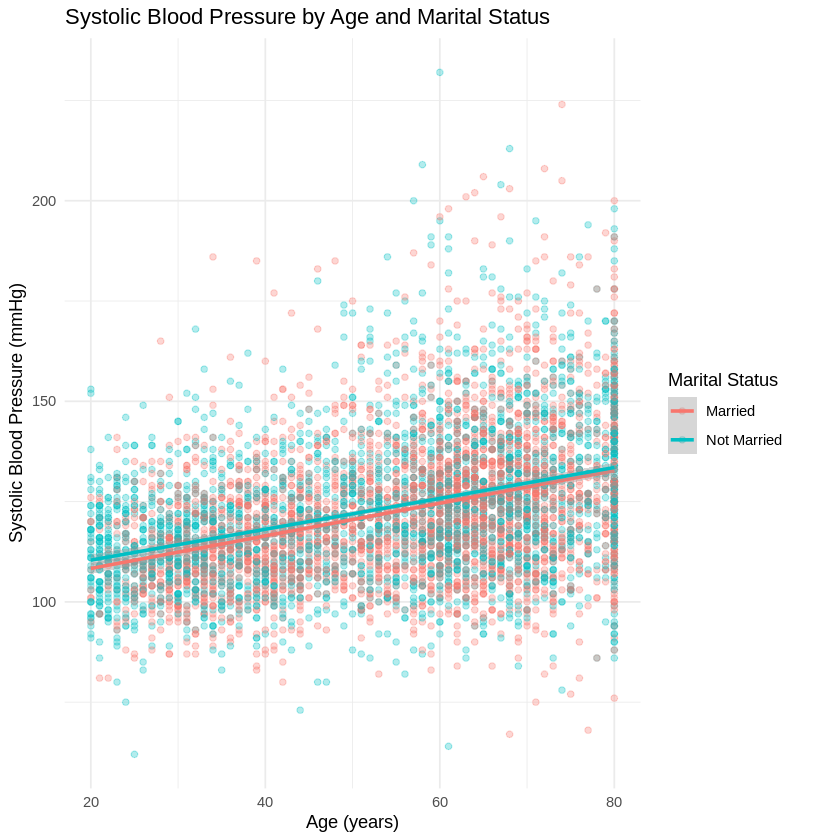

In [5]:
# QUESTION 3: How do age and marital status affect systolic blood pressure?

# Method of analysis: Multiple Linear Regression
# Method justification: MLR is best because we have one continuous (age) and one categorical (marital status) predictor affecting a continuous outcome.
# IV = Age (continuous) and Marital status (categorical)
# DV = Systolic blood pressure (continuous)
# Results for Age
    # Coefficient = 0.39524
    # Standard error = 0.01314
    # P-value < 2e-16 (highly significant)
# Interpretation: Systolic BP increases with age
# Results for Marital Status (Not Married vs Married):
    # Coefficient = 1.34909
    # Standard error = 0.45110
    # P-value = 0.0028
# Interpretation: Systolic BP is higher in non-married individuals than married individuals.
    # Residual standard error: 17.1 on 5832 degrees of freedom
    # R-squared results: 0.1344 (13.44%) variance in systolic blood pressure
    # Overall model F-statistic: 452.9 on 2 and 5832 DF
    # Overall model p-value: < 2.2e-16
# Interpretation of results and conclusion: Both age and marital status are significant predictors of systolic blood pressure with age being the dominant predictor. Increased age is associated with higher BP and so is non-married status.

# Recoded marital status like in cell 3
demo_clean$marital_binary <- ifelse(demo_clean$DMDMARTZ == 1, "Married", "Not Married")

# Merged demo_clean + bpxo_clean by SEQN
q3_df <- merge(demo_clean, bpxo_clean, by="SEQN")

# Regression and summary of results
model <- lm(BPXOSY3 ~ RIDAGEYR + marital_binary, data=q3_df)
summary(model)

# Visualization (scatterplot)
ggplot(q3_df, aes(x = RIDAGEYR, y = BPXOSY3, color = marital_binary)) +
  geom_point(alpha=0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Systolic Blood Pressure by Age and Marital Status",
       x = "Age (years)", y = "Systolic Blood Pressure (mmHg)",
       color = "Marital Status") +
  theme_minimal()

In [6]:
# QUESTION 4: Is there a correlation between self-reported weight and minutes of sedentary behavior?

# Method of analysis: Simple Linear Regression
# Method justification: We're examining if one continuous variable (weight) predicts another continuous variable (sedentary time).
# IV = Self-reported weight (continuous)
# DV = Sedentary behavior time (continuous)
# Results:
    # Intercept: 239.32 minutes
    # Weight coefficient: 0.68 minutes per pound
# Interpretation: Sedentary time increases with weight
    # P-value: < 2.2e-16 (highly significant)
    # R-squared: 0.02433 (2.43%)
    # Interpretation: Weight explains only 2.43% of the variance in sedentary behavior
    # F-statistic: 198.3 on 1 and 7952 DF,  p-value: < 2.2e-16
# Interpretation of results and conclusion: Weight is a statistically significant predictor of sedentary behavior (~p < 0.001). As weight increases, sedentary behavior time also increases.

# Merged whq_clean + paq_clean by SEQN
q4_df <- merge(whq_clean, paq_clean, by="SEQN")

# Regression and summary of results
model_q4 <- lm(PAD680 ~ WHD020, data=q4_df)
summary(model_q4)



Call:
lm(formula = PAD680 ~ WHD020, data = q4_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-484.70 -154.33  -38.26  132.10 1049.06 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 239.32409    9.00957   26.56   <2e-16 ***
WHD020        0.67861    0.04819   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.9 on 7952 degrees of freedom
Multiple R-squared:  0.02433,	Adjusted R-squared:  0.0242 
F-statistic: 198.3 on 1 and 7952 DF,  p-value: < 2.2e-16


              Df    Sum Sq Mean Sq F value Pr(>F)    
DMDEDUC2       4  11139743 2784936   64.33 <2e-16 ***
Residuals   7694 333062749   43289                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = PAD680 ~ DMDEDUC2, data = q5_df)

$DMDEDUC2
                            diff       lwr       upr     p adj
9-11th-< 9th           57.397875  20.14630  94.64945 0.0002566
HS/GED-< 9th           64.742488  31.89853  97.58645 0.0000008
Some College-< 9th     98.315302  66.21756 130.41304 0.0000000
College+-< 9th        140.373973 108.49931 172.24864 0.0000000
HS/GED-9-11th           7.344613 -18.75271  33.44194 0.9398180
Some College-9-11th    40.917427  15.76570  66.06916 0.0000897
College+-9-11th        82.976098  58.10967 107.84252 0.0000000
Some College-HS/GED    33.572814  15.58238  51.56325 0.0000036
College+-HS/GED        75.631485  58.04214  93.22083 0.0000000
College+-Some College  42.058671  25.90552  58.21182 0.0000000


      DMDEDUC2   PAD680
1        < 9th 264.9861
2       9-11th 322.3840
3       HS/GED 329.7286
4 Some College 363.3015
5     College+ 405.3601


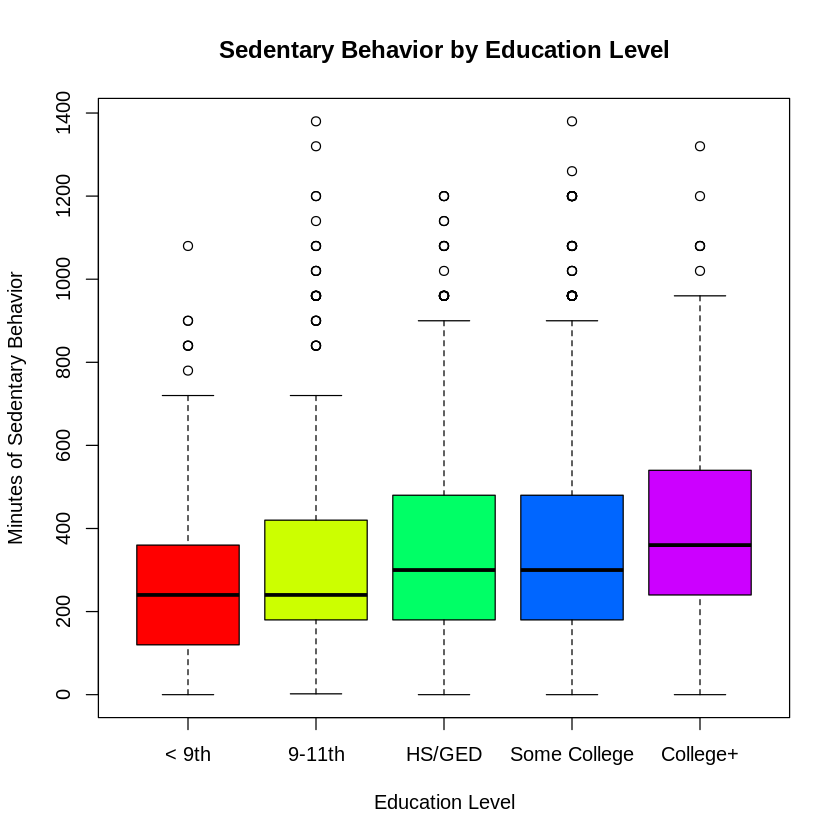

In [7]:
# QUESTION 5: Does sedentary behavior differ by education level?

# Variables used: DMDEDUC2 and PAD680
# Method of analysis: One-way ANOVA
# Method justification: One-way ANOVA is best because we are examining the effect of one independent variable (education level with 5 categories) on one dependent variable (sedentary behavior).
# IV = Education level (categorical)
# DV = Sedentary time (continous)
# Results: F-statistic:** 64.33, Degrees of freedom: 4 and 7694, P-value:< 2e-16
  # Mean sedentary time by education level:
    # Less than 9th grade (1): 264.98 minutes (about 4.4 hours)
    # 9th-11th grade (2): 322.38 minutes (about 5.4 hours)
    # High School/GED (3): 329.72 minutes (about 5.5 hours)
    # Some College (4): 363.30 minutes (about 6.1 hours)
    # College graduate or higher (5): 405.36 minutes (about 6.8 hours)
# Interpretation of results and conclusion: There is a highly statistically significant difference in mean sedentary behavior time across education levels. Sedentary behavior time increases with higher education levels. This might be because college graduates are more likely to work desk jobs which come with a sedentary work environment.

# Merged demo_clean + paq_clean by SEQN
q5_df <- merge(demo_clean, paq_clean, by="SEQN")

# Converted education to labeled factor before ANOVA
q5_df$DMDEDUC2 <- factor(q5_df$DMDEDUC2,
                         levels = c(1,2,3,4,5),
                         labels = c("< 9th", "9-11th", "HS/GED", "Some College", "College+"))

# One-Way ANOVA and summary of results
model_anova <- aov(PAD680 ~ DMDEDUC2, data=q5_df)
summary(model_anova)

# Post-hoc test
TukeyHSD(model_anova)

# Calculated mean sedentary time for each education group + print results
means <- aggregate(PAD680 ~ DMDEDUC2, data=q5_df, FUN=mean)
print(means)

# Visualization
boxplot(PAD680 ~ DMDEDUC2, data=q5_df,
        col=rainbow(5),
        main="Sedentary Behavior by Education Level",
        xlab="Education Level",
        ylab="Minutes of Sedentary Behavior")